# PPP: Global Maps


To do: 1. annual mean predictability horizons, 2. max horizons, 3. range horizons

In [1]:
# Importing packages
import math
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import nc_time_axis
from dask.diagnostics import ProgressBar
import re
from xmovie import Movie
%matplotlib inline
import imageio
import math
import pandas as pd


In [2]:
gridpath = ('/projects/SOCCOM/data/ESM4_PPE/archive/Richard.Slater/xanadu_esm4_20190304_mom6_ESM4_v1.0.3_rc1/GRID/ocean.static.nc')
grid = xr.open_dataset(gridpath)

In [3]:
rootdir = ('/projects/SOCCOM/data/ESM4_PPE/archive/Richard.Slater/xanadu_esm4_20190304_mom6_ESM4_v1.0.3_rc1/ESM4_piControl_D/gfdl.ncrc4-intel18-prod-openmp/pp/')
ppname = 'ocean_month'
ppname2 = 'ocean_cobalt_omip_2d'
ppname3 = 'ocean_cobalt_omip_sfc'

localdir = '/ts/monthly/5yr/'

In [4]:
# minor helper method - returns the ppname for a particular driver
def pp(driver):
    if driver=='tos' or driver=='sos' or driver=='MLD_003':
        return 'ocean_month'
    elif re.search('intpp*',driver):
        return 'ocean_cobalt_omip_2d'
    elif re.search('os',driver):
        return 'ocean_cobalt_omip_sfc'

In [5]:
THRESHOLD = 0.235559205


In [6]:
npp_ppp = xr.open_dataset('/home/saumyam/npp_ppp_m.nc')
tos_ppp = xr.open_dataset('/home/saumyam/tos_ppp_m.nc')
sos_ppp = xr.open_dataset('/home/saumyam/sos_ppp_m.nc')
mld_ppp = xr.open_dataset('/home/saumyam/mld_ppp_m.nc')
chlos_ppp = xr.open_dataset('/home/saumyam/chlos_ppp_m.nc')
unmasked = xr.open_dataset('/home/saumyam/tosppp.nc')

In [7]:
o2os_ppp = xr.open_dataset('/home/saumyam/o2os_ppp_m.nc')
no3os_ppp = xr.open_dataset('/home/saumyam/no3os_ppp_m.nc')
po4os_ppp = xr.open_dataset('/home/saumyam/po4os_ppp_m.nc')
phos_ppp = xr.open_dataset('/home/saumyam/phos_ppp_m.nc')

In [10]:
def coarse_ppp(driver, driver_ppp):
    annual = driver_ppp.coarsen(time=12).mean()
    coarse_months = xr.where(annual<THRESHOLD,annual.time,120).min(dim='time').where(grid['basin']!=0) # eventually replace this with 120 if it works
    #coarse_months[driver].plot()
    return annual

In [59]:
def smooth_ppp(driver, driver_ppp):
    smoothed = driver_ppp.rolling(time=12, center=True, min_periods=1).mean()
    smooth_months = xr.where(smoothed<THRESHOLD, smoothed.time,120)
    remask = smooth_months.where(driver_ppp[driver].notnull())
    minimum = remask.min(dim='time',skipna=True)
    minimum[driver].plot()
    
    
    null = wherenull(driver, driver_ppp)
    mesh = plt.pcolormesh(driver_ppp.xh,driver_ppp.yh,driver_ppp['intpp'])
    #hatch = plt.fill_between([-300,60],-100,100,hatch='///////',color="none",edgecolor='black')
    plt.pcolor(null.xh, null.yh, driver_ppp.where(null.notnull())['intpp'], hatch='....', alpha=0.)
    #mesh_masked = plt.pcolormesh(null.xh,null.yh,ppp.where(null.isnull())['intpp'],zorder=2)


In [60]:
def wherenull(driver, driver_ppp):
    null = driver_ppp[driver].isnull() # returns a boolean array
    null_int = xr.where(null, 1, 0)
    null_map = null_int.sum(dim='time')
    null_map = null_map.where(grid['basin']!=0)
    null_map2 = null_map.where(null_map>0)
    return null_map2

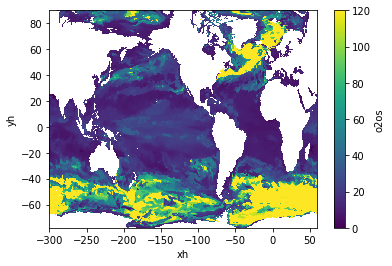

In [15]:
null_map = smooth_ppp('o2os',o2os_ppp)

<xarray.DataArray 'phos' (yh: 576, xh: 720)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * xh       (xh) float64 -299.8 -299.2 -298.8 -298.2 ... 58.75 59.25 59.75
  * yh       (yh) float64 -77.91 -77.72 -77.54 -77.36 ... 89.47 89.68 89.89

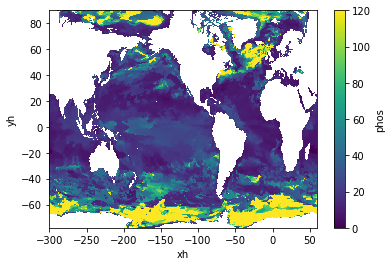

In [14]:
smooth_ppp('phos',phos_ppp)

<xarray.DataArray 'tos' (yh: 576, xh: 720)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * xh       (xh) float64 -299.8 -299.2 -298.8 -298.2 ... 58.75 59.25 59.75
  * yh       (yh) float64 -77.91 -77.72 -77.54 -77.36 ... 89.47 89.68 89.89

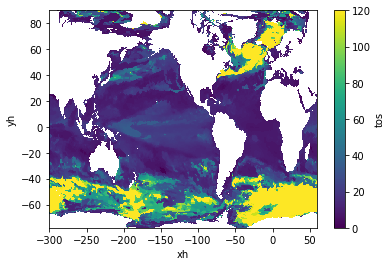

In [11]:
smooth_ppp('tos',tos_ppp)

<xarray.DataArray 'tos' (yh: 576, xh: 720)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * xh       (xh) float64 -299.8 -299.2 -298.8 -298.2 ... 58.75 59.25 59.75
  * yh       (yh) float64 -77.91 -77.72 -77.54 -77.36 ... 89.47 89.68 89.89

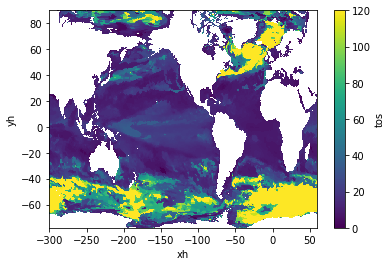

In [29]:
smooth_ppp('tos',unmasked)

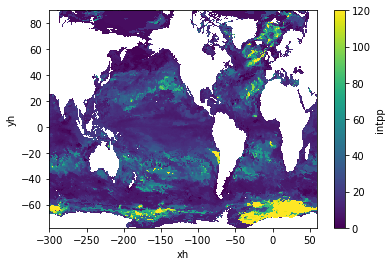

In [55]:
null, ppp = smooth_ppp('intpp',npp_ppp)

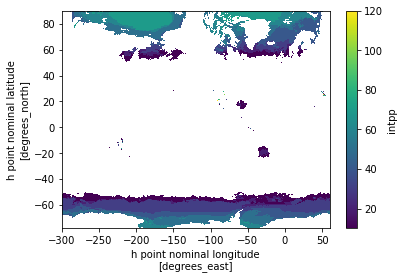

In [56]:
null.plot()

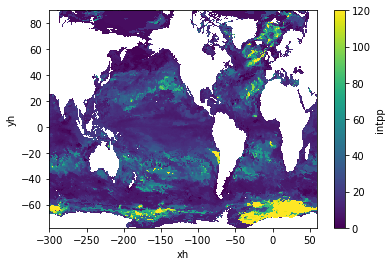

In [24]:
mapp.plot()

/tmp/ipykernel_631261/538737327.py:1: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mesh = plt.pcolormesh(ppp.xh,ppp.yh,ppp['intpp'])
/tmp/ipykernel_631261/538737327.py:3: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(null.xh, null.yh, ppp.where(null.notnull())['intpp'], hatch='....',alpha=0.)


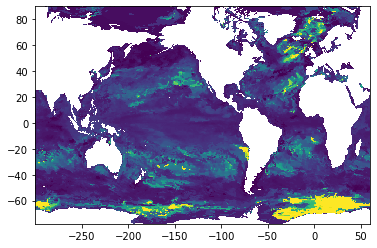

In [62]:
mesh = plt.pcolormesh(ppp.xh,ppp.yh,ppp['intpp'])
#hatch = plt.fill_between([-300,60],-100,100,hatch='///////',color="none",edgecolor='black')
plt.pcolor(null.xh, null.yh, ppp.where(null.notnull())['intpp'], hatch='....',alpha=0.)
#mesh_masked = plt.pcolormesh(null.xh,null.yh,ppp.where(null.isnull())['intpp'],zorder=2)



In [10]:
# returns the variance for a particular ensemble start year
def ens_var(start_year, driver_global, driver):
    # create a list of xarrays of control + ensemble data to be concatenated
    members = [*range(10)]
    ppname = pp(driver)
    
    # handle the control separately
    end = '0' + str(int(start_year) + 9)
    ctrl_slice = driver_global.sel(time=slice(start_year+'-01-16',end+'-12-16'))
    members[0] = ctrl_slice
    
    # loop through all 9 ensemble members
    for member in range(1,10):
        folder = 'ESM4_piControl_D-ensemble-' + start_year + '0101-0' + str(member)
        path = ('/projects/SOCCOM/data/ESM4_PPE/archive/Richard.Slater/xanadu_esm4_20190304_mom6_ESM4_v1.0.3_rc1/'
                +folder+'/gfdl.ncrc4-intel18-prod-openmp/pp/'+ppname+'/ts/monthly/5yr/'+ppname+'.*'+driver+'.nc')
        ens_mem = xr.open_mfdataset(path)
        members[member] = ens_mem
        
    # combine all ensemble members and control into one xarray
    all_members = xr.concat(members,dim='members')
    
    # compute the variance
    variance = (all_members.std(dim='members')) ** 2
    
    return variance
    


In [11]:
STARTS = ['0123','0161','0185','0208','0230','0269','0300','0326','0359','0381']
def avg_ens_var(driver_global, driver):
    # initialize total to be stddev of first ensemble - year '0123'
    
    ensembles = [*range(10)]
    first = ens_var(STARTS[0],driver_global,driver)
    timei = first.time
    ensembles[0] = first
    
    for ens in range(1,10):
        time_adjusted = ens_var(STARTS[ens],driver_global,driver).assign_coords(time=timei)
        ensembles[ens] = time_adjusted
    
    total = xr.concat(ensembles,dim='ensemble')
    avg = total.mean(dim='ensemble')
    
    return avg


## Plotting

### Packaged into one function that just takes the driver name as input:

In [20]:
# returns xarray of ppp
def ppp(driver, mask=True, percentage=0.01):
    ds = xr.open_dataset('/projects/SOCCOM/saumyam/data_netcdf_files/Control_Full/'+driver)
    ds = ds.chunk({'time':60})
    
    avg_ens = avg_ens_var(ds,driver)
    with ProgressBar():
        avg_ens = avg_ens.compute()
    timeindex = np.arange(120)
    avg_ens = avg_ens.assign_coords(time=timeindex)
    
    control_monthly = ds[driver].groupby('time.month')
    control_var_monthly = control_monthly.std() ** 2
    control_var_arr = control_var_monthly.to_numpy()
    repeated = np.tile(control_var_arr, (10,1,1))
    #xarray.repeat
    
    ctrl_var = avg_ens.copy(data={driver:repeated})
    ctrl_var = ctrl_var.assign_coords(time=timeindex)
    
    # masking - if average ensemble variance at a gridpoint < 1% of global average, don't count it
    # 1. get global average ensemble variance
    ctrl_var_global = ctrl_var[driver].weighted(grid['areacello']).mean(['xh','yh'])
    with ProgressBar():
        ctrl_var_global = ctrl_var_global.compute()
    ratio = avg_ens / ctrl_var
    ppp = 1 - ratio
    old = ppp
    if mask:
        ppp = ppp.where(ctrl_var > percentage*ctrl_var_global)
    return ppp

In [63]:
# e.g. driver = 'tos', driver_name = 'Sea Surface Temperature'
def plot_basins(ppp, driver, driver_name, adjust=False):
    if adjust:
        ppp = ppp.where(ppp[driver] > -100)

    means = [*range(5)]
    for i in range(1,6):
        basin = ppp.where(grid['basin']==i,drop=True)
        means[i-1] = (basin[driver].weighted(grid['areacello']).mean(['xh','yh']))

    ppp_mean = ppp[driver].weighted(grid['areacello']).mean(['xh','yh'])

    labels = ['Southern Ocean', 'Atlantic Ocean', 'Pacific Ocean', 'Arctic Ocean', 'Indian Ocean']
    figure(figsize=(14,8))
    for i in range(5):
        means[i].plot(label=labels[i])
   
    ppp_mean.plot(linewidth=4,label='Global Average')
    plt.ylabel('PPP of ' + driver_name)
    plt.title('Averaged PPP of ' + driver_name)
    plt.legend()
    
    return ppp_mean

## See where the NPP would be masked out with a variance mask

In [ ]:
npp_ppp_mask, avg_ens, pre_mask = ppp('intpp',mask=True)

In [ ]:
avg_ens_global = avg_ens['intpp'].weighted(grid['areacello']).mean(['xh','yh'])

masked_out = pre_mask.where(avg_ens < 0.01*avg_ens_global)

In [ ]:
masked_out['intpp'].isel(time=11).plot()

In [ ]:
masked = Movie(masked_out['intpp'],vmin=-1,vmax=1)
masked.save('masked.mp4',gif_framerate=5)

In [ ]:
npp_mask = Movie(npp_ppp_mask['intpp'],vmin=0,vmax=1)
npp_mask.save('npp_masked.mp4',framerate=5)

In [ ]:
coarse_ppp('intpp',npp_ppp_mask)
plt.title('PPP of NPP, Annual Mean (With variance mask)')

<xarray.Dataset>
Dimensions:  (time: 10, yh: 576, xh: 720, nv: 2)
Coordinates:
  * xh       (xh) float64 -299.8 -299.2 -298.8 -298.2 ... 58.75 59.25 59.75
  * yh       (yh) float64 -77.91 -77.72 -77.54 -77.36 ... 89.47 89.68 89.89
  * time     (time) float64 5.5 17.5 29.5 41.5 53.5 65.5 77.5 89.5 101.5 113.5
  * nv       (nv) float64 1.0 2.0
Data variables:
    intpp    (time, yh, xh) float32 nan nan nan nan nan ... nan nan nan nan nan

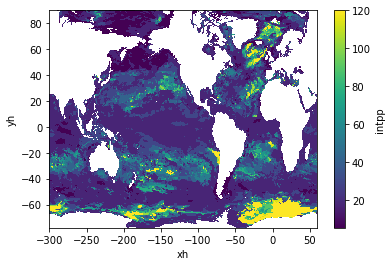

In [30]:
coarse_ppp('intpp',npp_ppp)

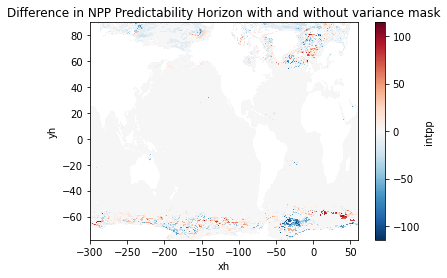

In [41]:
(coarse_ppp('intpp',npp_ppp_mask)-coarse_ppp('intpp',npp_ppp))['intpp'].plot()
plt.title('Difference in NPP Predictability Horizon with and without variance mask')
plt.savefig('Difference in NPP Predictability Horizon with and without variance mask')

In [31]:
npp_ppp_mask_mean = npp_ppp_mask['intpp'].weighted(grid['areacello']).mean(['xh','yh'])
npp_ppp_mean = npp_ppp['intpp'].weighted(grid['areacello']).mean(['xh','yh'])

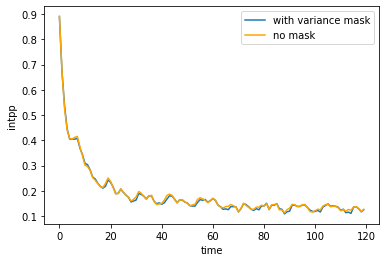

In [34]:
npp_ppp_mask_mean.plot(label='with variance mask')
npp_ppp_mean.plot(color='orange',label = 'no mask')
plt.legend()

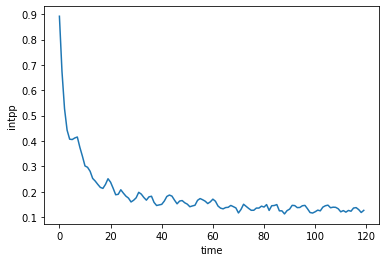

In [27]:
npp_ppp_mask_mean.plot()

In [13]:
# variance weighted ppp using npp_ppp and avg_ens
driver='intpp'
ds = xr.open_dataset('/projects/SOCCOM/saumyam/data_netcdf_files/Control_Full/'+driver)
ds = ds.chunk({'time':60})

control_monthly = ds[driver].groupby('time.month')
control_var_monthly = control_monthly.std() ** 2
control_var_arr = control_var_monthly.to_numpy()
repeated = np.tile(control_var_arr, (10,1,1))

ctrl_var = avg_ens.copy(data={driver:repeated})
ctrl_var = ctrl_var.assign_coords(time=np.arange(120))

/home/saumyam/.conda/envs/saumyac/lib/python3.9/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


In [85]:
#returns control variance by month, repeated for 10 years
def ctrl_var(driver,driver_ppp):
    ds = xr.open_dataset('/projects/SOCCOM/saumyam/data_netcdf_files/Control_Full/'+driver)
    ds = ds.chunk({'time':60})

    control_monthly = ds[driver].groupby('time.month')
    control_var_monthly = control_monthly.std() ** 2
    control_var_arr = control_var_monthly.to_numpy()
    repeated = np.tile(control_var_arr, (10,1,1))

    ctrl_var = driver_ppp.copy(data={driver:repeated})
    ctrl_var = ctrl_var.assign_coords(time=np.arange(120))
    return ctrl_var

In [24]:
ctrl_var

<xarray.Dataset>
Dimensions:  (xh: 720, yh: 576, time: 120, nv: 2)
Coordinates:
  * xh       (xh) float64 -299.8 -299.2 -298.8 -298.2 ... 58.75 59.25 59.75
  * yh       (yh) float64 -77.91 -77.72 -77.54 -77.36 ... 89.47 89.68 89.89
  * time     (time) int64 0 1 2 3 4 5 6 7 8 ... 112 113 114 115 116 117 118 119
  * nv       (nv) float64 1.0 2.0
Data variables:
    intpp    (time, yh, xh) float32 nan nan nan nan nan ... nan nan nan nan nan

In [19]:
weighted_ppp = npp_ppp.weighted((ctrl_var['intpp'] * grid['areacello']).fillna(0)).mean(['xh','yh'])


In [ ]:
ppp_mean = ppp[driver].weighted(grid['areacello']).mean(['xh','yh'])

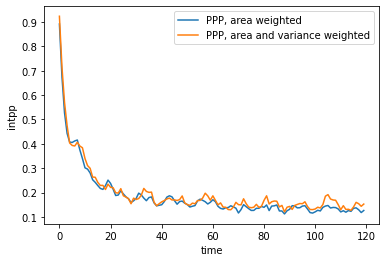

In [23]:
ppp_unweighted = npp_ppp['intpp'].weighted(grid['areacello']).mean(['xh','yh'])
ppp_unweighted.plot(label='PPP, area weighted')
#ppp_weighted.plot(label='PPP, area and variance weighted')
weighted_ppp['intpp'].plot(label='PPP, area and variance weighted')
#ppp_weighted_mask.plot(label='PPP, masked and weighted')

plt.legend()

In [50]:
m = npp_ppp.time % 12

In [1]:
# e.g. driver = 'tos', driver_name = 'Sea Surface Temperature'
def plot_basins(ppp, driver, driver_name, adjust=False):
    if adjust:
        ppp = ppp.where(ppp[driver] > -100)

    means = [*range(5)]
    for i in range(1,6):
        basin = ppp.where(grid['basin']==i,drop=True)
        means[i-1] = (basin[driver].weighted(grid['areacello']).mean(['xh','yh']))

    ppp_mean = ppp[driver].weighted(grid['areacello']).mean(['xh','yh'])

    labels = ['Southern Ocean', 'Atlantic Ocean', 'Pacific Ocean', 'Arctic Ocean', 'Indian Ocean']
    figure(figsize=(14,8))
    for i in range(5):
        means[i].plot(label=labels[i])
   
    ppp_mean.plot(linewidth=4,label='Global Average')
    plt.ylabel('PPP of ' + driver_name)
    plt.title('Averaged PPP of ' + driver_name)
    plt.legend()
    
    return ppp_mean

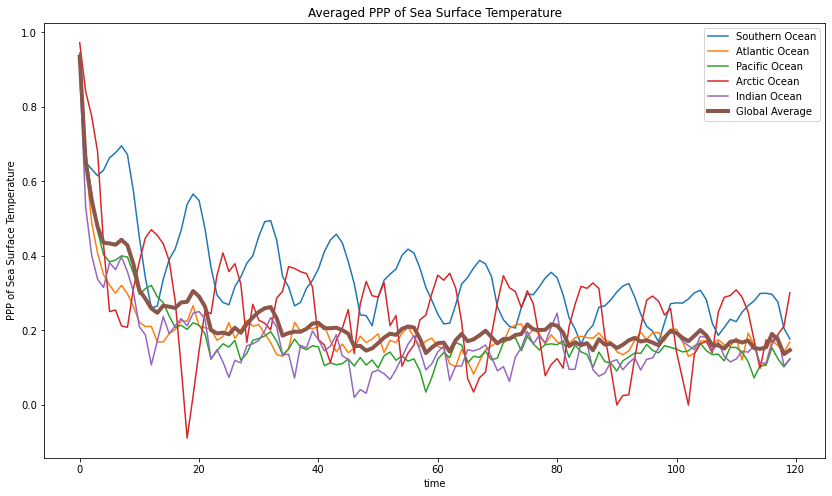

In [66]:
tos_ppp_mean = plot_basins(tos_ppp,'tos','Sea Surface Temperature')

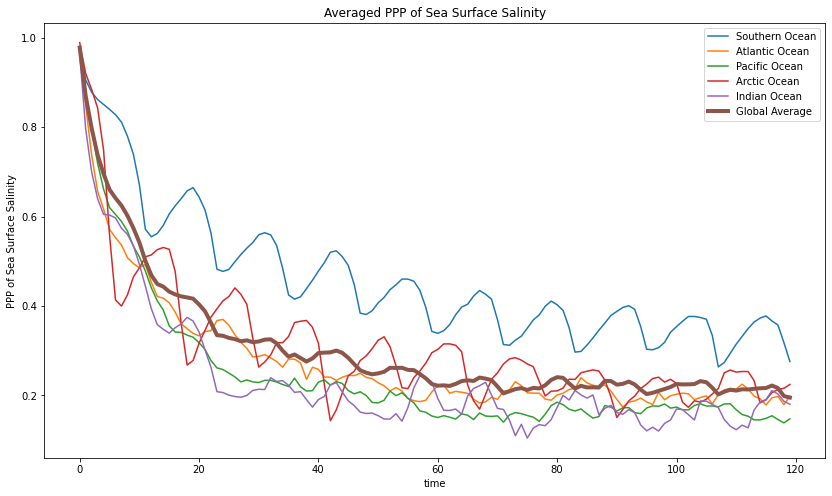

In [67]:
sos_ppp_mean = plot_basins(sos_ppp,'sos','Sea Surface Salinity')

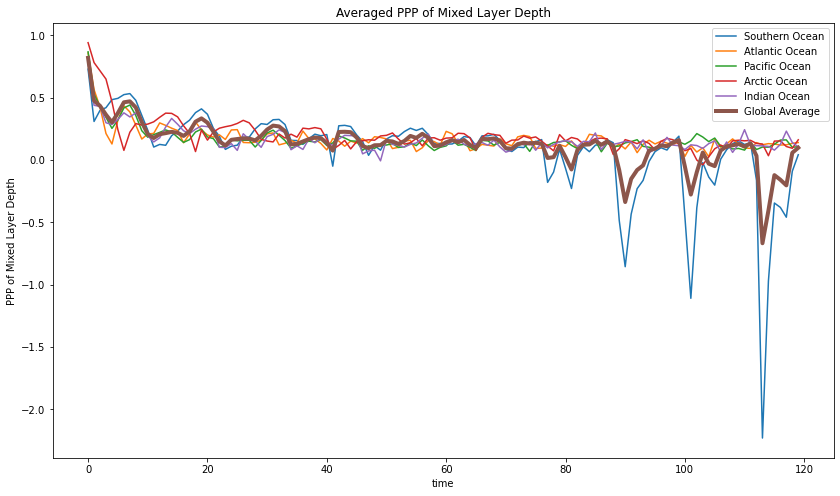

In [68]:
mld_ppp_mean = plot_basins(mld_ppp,'MLD_003','Mixed Layer Depth')

In [86]:
weighted_mld_ppp = mld_ppp.weighted((ctrl_var('MLD_003',mld_ppp)['MLD_003'] * grid['areacello']).fillna(0)).mean(['xh','yh'])


/home/saumyam/.conda/envs/saumyac/lib/python3.9/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


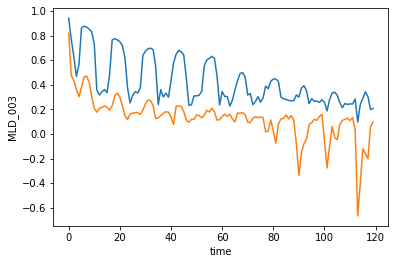

In [89]:
weighted_mld_ppp['MLD_003'].plot(label='weighted')
mld_ppp_mean.plot(label='unweighted')

In [ ]:
def 

/home/saumyam/.conda/envs/saumyac/lib/python3.9/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


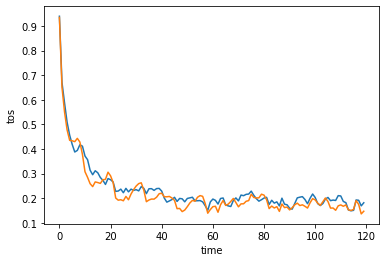

In [90]:
weighted_tos_ppp = tos_ppp.weighted((ctrl_var('tos',tos_ppp)['tos'] * grid['areacello']).fillna(0)).mean(['xh','yh'])

weighted_tos_ppp['tos'].plot(label='weighted')
tos_ppp_mean.plot(label='unweighted')

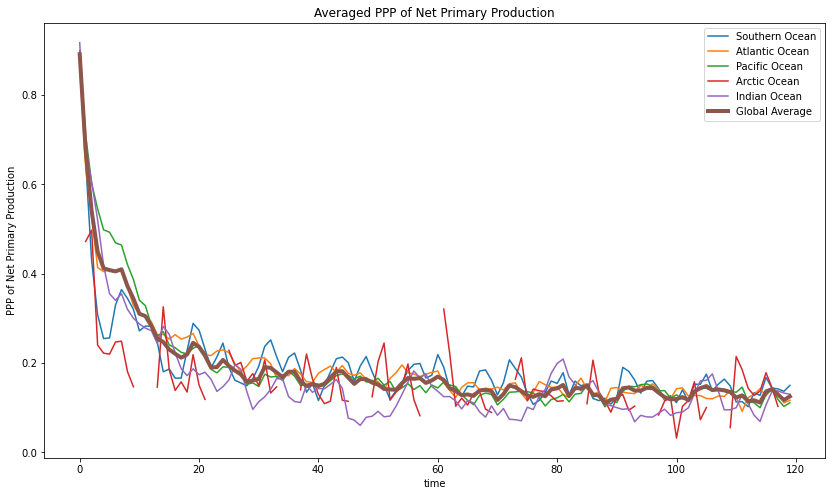

In [75]:
npp_ppp_mean = plot_basins(npp_ppp,'intpp','Net Primary Production')

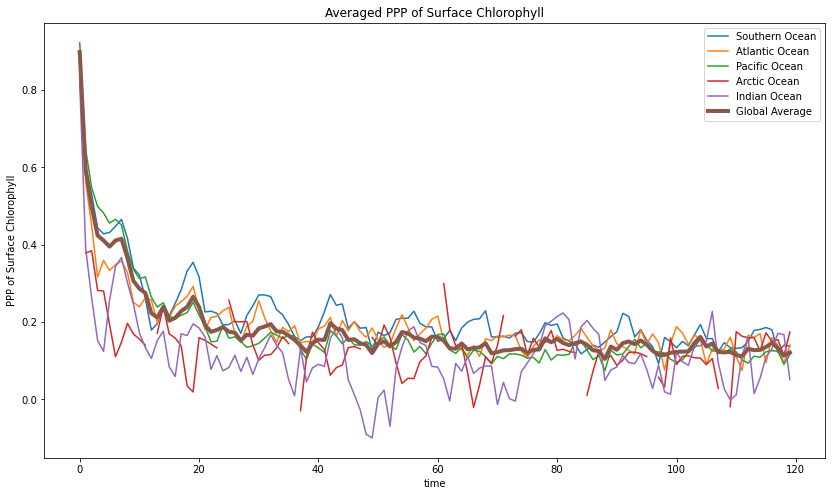

In [69]:
chlos_ppp_mean = plot_basins(chlos_ppp,'chlos','Surface Chlorophyll')

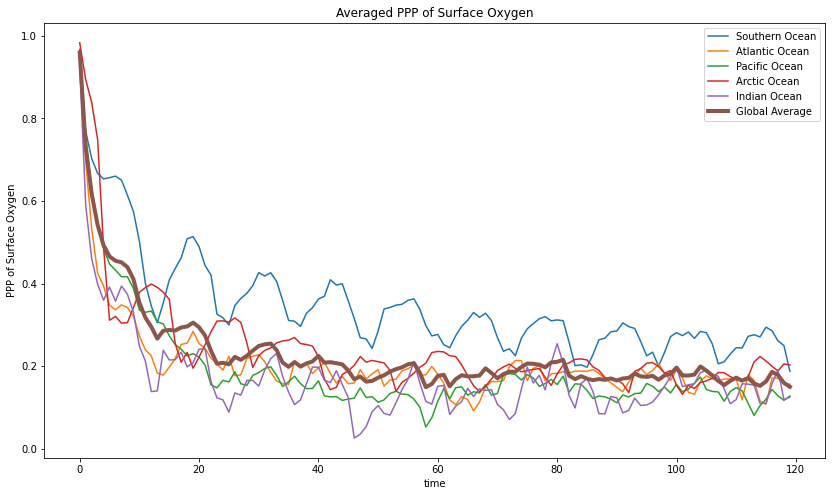

In [70]:
o2os_ppp_mean = plot_basins(o2os_ppp,'o2os','Oxygen')

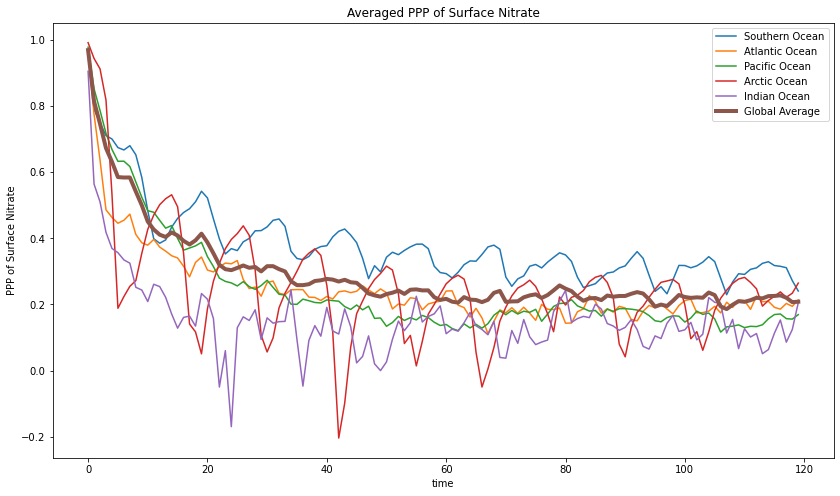

In [71]:
no3os_ppp_mean = plot_basins(no3os_ppp,'no3os', 'Nitrate')

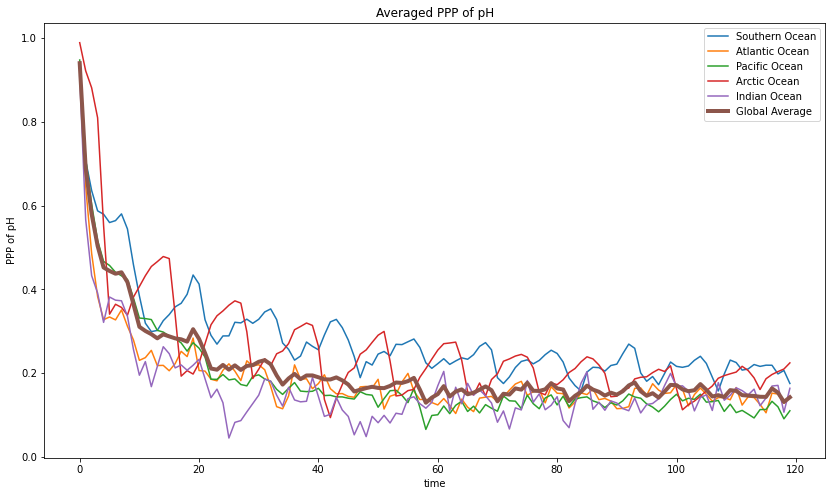

In [72]:
phos_ppp_mean = plot_basins(phos_ppp,'phos','pH')

In [78]:
annuals = [coarse_ppp('tos',tos_ppp),coarse_ppp('intpp',npp_ppp),coarse_ppp('phos',phos_ppp),coarse_ppp('o2os',o2os_ppp)]
drivers = ['tos','intpp','phos','o2os']
annuals_global = [*range(len(drivers))]

for i in range(len(annuals)):
    annuals_global[i] = annuals[i][drivers[i]].weighted(grid['areacello']).mean(['xh','yh'])
    
COLORS = ['black','green','red','blue']

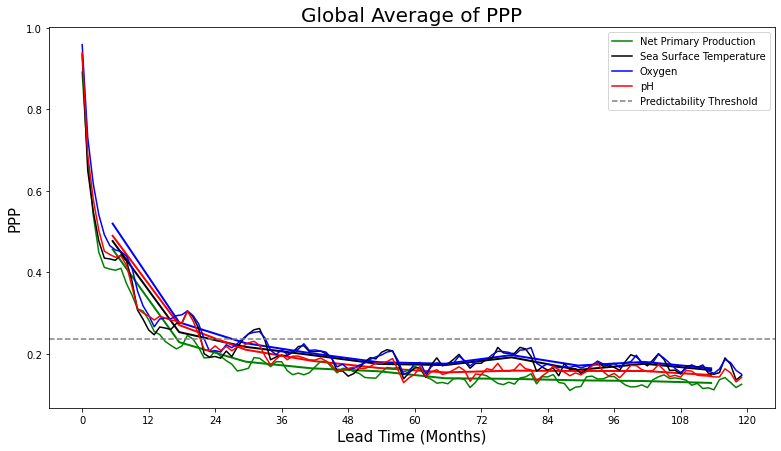

In [81]:

fig,ax = plt.subplots(1,1,figsize=(13,7))
months=[0,12,24,36,48,60,72,84,96,108,120]
ax.set_xticks(months)

for i in range(len(annuals_global)):
    annuals_global[i].plot(color=COLORS[i],linewidth=2)

npp_ppp_mean.plot(label='Net Primary Production',color='green')
#sos_ppp_mean.plot(label='Sea Surface Salinity')
tos_ppp_mean.plot(label='Sea Surface Temperature',color='black')
#mld_ppp_mean.plot(label='Mixed Layer Depth')
#chlos_ppp_mean.plot(label='Surface Chlorophyll')
o2os_ppp_mean.plot(label='Oxygen',color='blue')
phos_ppp_mean.plot(label='pH',color='red')
plt.axhline(y=THRESHOLD, color='grey', linestyle='dashed',label='Predictability Threshold')
plt.title('Global Average of PPP',fontsize=20)
plt.xlabel('Lead Time (Months)',fontsize=15)
plt.ylabel('PPP',fontsize=15)
plt.legend()
plt.savefig('Globally Averaged PPP-Frolicher Drivers')

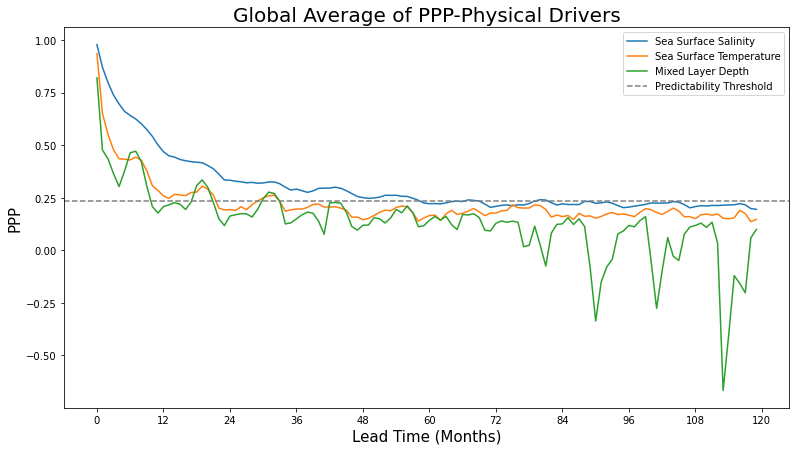

In [82]:

fig,ax = plt.subplots(1,1,figsize=(13,7))
months=[0,12,24,36,48,60,72,84,96,108,120]
ax.set_xticks(months)

sos_ppp_mean.plot(label='Sea Surface Salinity')
tos_ppp_mean.plot(label='Sea Surface Temperature')
mld_ppp_mean.plot(label='Mixed Layer Depth')
#chlos_ppp_mean.plot(label='Surface Chlorophyll')

plt.axhline(y=THRESHOLD, color='grey', linestyle='dashed',label='Predictability Threshold')
plt.title('Global Average of PPP-Physical Drivers',fontsize=20)
plt.xlabel('Lead Time (Months)',fontsize=15)
plt.ylabel('PPP',fontsize=15)
plt.legend()
plt.savefig('Globally Averaged PPP-Physical Drivers')

In [96]:
chlos_ppp_mean

<xarray.DataArray 'chlos' (time: 120)>
array([0.8900066 , 0.60012823, 0.48492032, 0.3977813 , 0.39093965,
       0.3848597 , 0.41084385, 0.409736  , 0.36224148, 0.30184588,
       0.27834827, 0.26922983, 0.22534671, 0.21733822, 0.23473702,
       0.19665167, 0.19926144, 0.22145082, 0.2441599 , 0.2649498 ,
       0.23021033, 0.19083904, 0.17884715, 0.17864469, 0.18911298,
       0.17607656, 0.16926841, 0.14321359, 0.14121307, 0.15571463,
       0.19130482, 0.192642  , 0.18692349, 0.17305055, 0.17297195,
       0.16030122, 0.15499423, 0.14088805, 0.12174966, 0.13828516,
       0.14805746, 0.14655243, 0.19697052, 0.18309781, 0.1728843 ,
       0.14628963, 0.14841355, 0.13795547, 0.13435139, 0.12322494,
       0.13474774, 0.13537139, 0.1257182 , 0.14178361, 0.17508562,
       0.17376858, 0.15984333, 0.15591067, 0.14986686, 0.15953511,
       0.15770155, 0.15239668, 0.12024641, 0.11210939, 0.12688649,
       0.1171808 , 0.13249421, 0.13671915, 0.13969924, 0.11274727,
       0.11691718, 0.12186317, 0.12613617, 0.12326838, 0.12000865,
       0.11094681, 0.11167787, 0.12699461, 0.1616704 , 0.14566886,
       0.14860208, 0.1389341 , 0.14019385, 0.14195718, 0.15014417,
       0.14472963, 0.11957502, 0.11748035, 0.09212636, 0.13017674,
       0.13471517, 0.14676984, 0.14989482, 0.14076072, 0.14945252,
       0.13843185, 0.12134136, 0.12299784, 0.10875938, 0.11135288,
       0.12583296, 0.1242655 , 0.12884904, 0.14471641, 0.15622522,
       0.12957534, 0.13823108, 0.11762451, 0.12118373, 0.12474146,
       0.10826714, 0.09729625, 0.10758441, 0.11624651, 0.12425572,
       0.12818405, 0.13704655, 0.12856461, 0.11537082, 0.11988243],
      dtype=float32)
Coordinates:
  * time     (time) int64 0 1 2 3 4 5 6 7 8 ... 112 113 114 115 116 117 118 119

# GIFs

In [45]:
sosmov = Movie(sos_ppp['sos'],vmin=0,vmax=1)
sosmov.save('sosppp.gif',gif_framerate=8)

Movie created at sosppp.mp4
GIF created at sosppp.gif


In [ ]:
mldmaskmov = Movie(mld_ppp['MLD_003'],vmin=0,vmax=1)
mldmaskmov.save('mldpppmask.mp4',framerate=5)

In [46]:
#tos_ppp = xr.open_dataset('/home/saumyam/tosppp.nc')
tosmov = Movie(tos_ppp['tos'],vmin=0,vmax=1)

In [48]:
tosmov.save('tosppp.gif',gif_framerate=8)

Movie created at tosppp.mp4
GIF created at tosppp.gif


In [51]:
nppmov = Movie(npp_ppp['intpp'],vmin=0,vmax=1)
nppmov.save('nppppp.gif',gif_framerate=8)

Movie created at nppppp.mp4
GIF created at nppppp.gif


In [53]:
mldmov = Movie(mld_ppp['MLD_003'],vmin=0,vmax=1)
mldmov.save('mldppp.gif',gif_framerate=8)

Movie created at mldppp.mp4
GIF created at mldppp.gif


In [54]:
chlosmov = Movie(chlos_ppp['chlos'],vmin=0,vmax=1)
chlosmov.save('chlosppp.gif',gif_framerate=8)

Movie created at chlosppp.mp4
GIF created at chlosppp.gif


In [60]:
# Combining the gifs
# Code Source: https://stackoverflow.com/questions/51517685/combine-several-gif-horizontally-python
#Create reader object for the gif
gif1 = imageio.get_reader('tosppp.gif')
gif2 = imageio.get_reader('nppppp.gif')
gif3 = imageio.get_reader('sosppp.gif')
gif4 = imageio.get_reader('chlosppp.gif')
#gif5 = imageio.get_reader('mldppp.gif')

#If they don't have the same number of frame take the shorter
number_of_frames = min(gif1.get_length(), gif2.get_length()) 

#Create writer object
new_gif = imageio.get_writer('output.gif')

for frame_number in range(number_of_frames):
    img1 = gif1.get_next_data()
    img2 = gif2.get_next_data()
    img3 = gif3.get_next_data()
    img4 = gif4.get_next_data()
    img5 = gif5.get_next_data()
    #here is the magic
    new_image = np.hstack((img1, img2))
    new_image2 = np.hstack((img3, img4))
    #newest = np.hstack((np.vstack((new_image, new_image2)), img5))
    new_gif.append_data(newest)

gif1.close()
gif2.close() 
gif3.close()
gif4.close()
gif5.close()
new_gif.close()


ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 640 and the array at index 1 has size 320

In [13]:
ds_o2os = xr.open_mfdataset(rootdir+ppname3+localdir+'*o2os.nc')
ds_no3os = xr.open_mfdataset(rootdir+ppname3+localdir+'*no3os.nc')
ds_po4os = xr.open_mfdataset(rootdir+ppname3+localdir+'*po4os.nc')
ds_phos = xr.open_mfdataset(rootdir+ppname3+localdir+'*phos.nc')

In [14]:
ppp('o2os',ds_o2os,False).to_netcdf('/home/saumyam/o2os_ppp.nc')
ppp('o2os',ds_o2os,True).to_netcdf('/home/saumyam/o2os_ppp_m.nc')

ppp('no3os',ds_no3os,False).to_netcdf('/home/saumyam/no3os_ppp.nc')


[####                                    ] | 12% Completed |  3.2s

/home/saumyam/.conda/envs/saumyac/lib/python3.9/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


[########################################] | 100% Completed | 36.4s


/home/saumyam/.conda/envs/saumyac/lib/python3.9/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


[####                                    ] | 12% Completed |  3.0s

/home/saumyam/.conda/envs/saumyac/lib/python3.9/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


[########################################] | 100% Completed | 35.1s


/home/saumyam/.conda/envs/saumyac/lib/python3.9/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


[####                                    ] | 10% Completed |  3.1s

/home/saumyam/.conda/envs/saumyac/lib/python3.9/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


[########################################] | 100% Completed | 37.1s


/home/saumyam/.conda/envs/saumyac/lib/python3.9/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


MergeError: conflicting values for variable 'no3os' on objects to be combined. You can skip this check by specifying compat='override'.

In [15]:
ppp('no3os',ds_no3os,True).to_netcdf('/home/saumyam/no3os_ppp_m.nc')

[####                                    ] | 10% Completed |  3.0s

/home/saumyam/.conda/envs/saumyac/lib/python3.9/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


[########################################] | 100% Completed | 35.6s


/home/saumyam/.conda/envs/saumyac/lib/python3.9/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


In [16]:
ppp('po4os',ds_po4os,False).to_netcdf('/home/saumyam/po4os_ppp.nc')
ppp('po4os',ds_po4os,True).to_netcdf('/home/saumyam/po4os_ppp_m.nc')



[#####                                   ] | 12% Completed |  3.0s

/home/saumyam/.conda/envs/saumyac/lib/python3.9/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


[########################################] | 100% Completed | 34.9s


/home/saumyam/.conda/envs/saumyac/lib/python3.9/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


[#####                                   ] | 13% Completed |  3.1s

/home/saumyam/.conda/envs/saumyac/lib/python3.9/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


[########################################] | 100% Completed | 37.9s


/home/saumyam/.conda/envs/saumyac/lib/python3.9/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


MergeError: conflicting values for variable 'phos' on objects to be combined. You can skip this check by specifying compat='override'.

In [18]:
ppp('phos',ds_phos,False).to_netcdf('/home/saumyam/phos_ppp.nc')
ppp('phos',ds_phos,True).to_netcdf('/home/saumyam/phos_ppp_m.nc')

/home/saumyam/.conda/envs/saumyac/lib/python3.9/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


[#####                                   ] | 12% Completed |  3.5s

/home/saumyam/.conda/envs/saumyac/lib/python3.9/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


[########################################] | 100% Completed | 50.3s


/home/saumyam/.conda/envs/saumyac/lib/python3.9/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


[####                                    ] | 11% Completed |  3.4s

/home/saumyam/.conda/envs/saumyac/lib/python3.9/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


[########################################] | 100% Completed | 45.1s


/home/saumyam/.conda/envs/saumyac/lib/python3.9/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


In [21]:
ppp('tos',True).to_netcdf('/home/saumyam/tos_ppp_m.nc')
ppp('sos',True).to_netcdf('/home/saumyam/sos_ppp_m.nc')
ppp('MLD_003',True).to_netcdf('/home/saumyam/mld_ppp_m.nc')


[###                                     ] | 8% Completed |  2.2s

/home/saumyam/.conda/envs/saumyac/lib/python3.9/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


[########################################] | 100% Completed | 31.7s


/home/saumyam/.conda/envs/saumyac/lib/python3.9/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


[####                                    ] | 10% Completed |  2.3s

/home/saumyam/.conda/envs/saumyac/lib/python3.9/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


[########################################] | 100% Completed | 33.2s


/home/saumyam/.conda/envs/saumyac/lib/python3.9/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


[###                                     ] | 9% Completed |  2.5s

/home/saumyam/.conda/envs/saumyac/lib/python3.9/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


[########################################] | 100% Completed | 34.5s


/home/saumyam/.conda/envs/saumyac/lib/python3.9/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


TypeError: can only concatenate str (not "NoneType") to str

In [22]:
ppp('intpp',True).to_netcdf('/home/saumyam/npp_ppp_m.nc')
ppp('chlos',True).to_netcdf('/home/saumyam/chlos_ppp_m.nc')

[####                                    ] | 11% Completed |  2.5s

/home/saumyam/.conda/envs/saumyac/lib/python3.9/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


[########################################] | 100% Completed | 31.0s


/home/saumyam/.conda/envs/saumyac/lib/python3.9/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


[####                                    ] | 10% Completed |  2.1s

/home/saumyam/.conda/envs/saumyac/lib/python3.9/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


[########################################] | 100% Completed | 31.3s


/home/saumyam/.conda/envs/saumyac/lib/python3.9/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
